In [1]:
import h5py as h
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

%matplotlib widget

In [2]:
fname = "/Volumes/ME424_HD/nanopores/2023_02_20/ch1/pore2/data3/EVENTS.hdf5"
file = h.File(fname, 'r')

In [3]:
data = file["current_data"]
sets = list(data.keys())

In [4]:
data[sets[3]]

<HDF5 dataset "Event_No_101": shape (238,), type "<f8">

In [5]:
df = pd.DataFrame()
for set in data:
    props = dict(data[set].attrs)
    row = pd.DataFrame([pd.Series(data = [set,*props.values()], index = ["name", *props.keys()])])
    df = pd.concat([df, row], ignore_index = True)

In [6]:
df

,name,duration_s,ecd,ffap,lfap,linearity,mean,samples
0,Event_No_1,0.000520,-0.000104,0.315829,0.152190,0.011426,-0.200112,130
1,Event_No_10,0.000156,-0.000026,0.170841,0.223569,0.009536,-0.165036,39
2,Event_No_100,0.000012,-0.000001,-0.000000,0.337401,0.003642,-0.105523,3
3,Event_No_101,0.000156,-0.000020,0.169102,0.209410,0.002674,-0.127331,39
4,Event_No_102,0.000356,-0.000107,0.133090,0.174746,0.015255,-0.301290,89
...,...,...,...,...,...,...,...,...
805,Event_No_95,0.000064,-0.000015,0.118586,0.214814,0.032614,-0.227577,16
806,Event_No_96,0.000420,-0.000098,0.143910,0.139589,0.014722,-0.234119,105
807,Event_No_97,0.000580,-0.000114,0.248907,0.156259,0.007572,-0.196830,145
808,Event_No_98,0.000376,-0.000104,0.234594,0.124896,0.010624,-0.277319,94


In [ ]:
plt.figure()
plt.scatter(df.linearity,df.ecd,alpha = 0.1)

In [7]:
df_filt = df.query('samples > 150 & linearity < 0.01')

In [8]:
df_filt

,name,duration_s,ecd,ffap,lfap,linearity,mean,samples
12,Event_No_11,0.000760,-0.000121,0.278016,0.181168,0.004100,-0.159832,190
13,Event_No_110,0.000628,-0.000103,0.154068,0.219446,0.006112,-0.164148,157
16,Event_No_113,0.000728,-0.000109,0.171040,0.205381,0.003022,-0.149739,182
26,Event_No_122,0.000704,-0.000113,0.212744,0.193689,0.003915,-0.159856,176
32,Event_No_128,0.000760,-0.000120,0.196113,0.191271,0.003891,-0.158142,190
33,Event_No_129,0.000732,-0.000109,0.166934,0.213904,0.002913,-0.149130,183
49,Event_No_143,0.000636,-0.000109,0.208963,0.185564,0.007945,-0.171730,159
51,Event_No_145,0.000648,-0.000108,0.203617,0.187515,0.004753,-0.167192,162
54,Event_No_148,0.000612,-0.000123,0.256598,0.154693,0.006773,-0.201666,153
82,Event_No_173,0.000640,-0.000106,0.142114,0.212154,0.007462,-0.165296,160


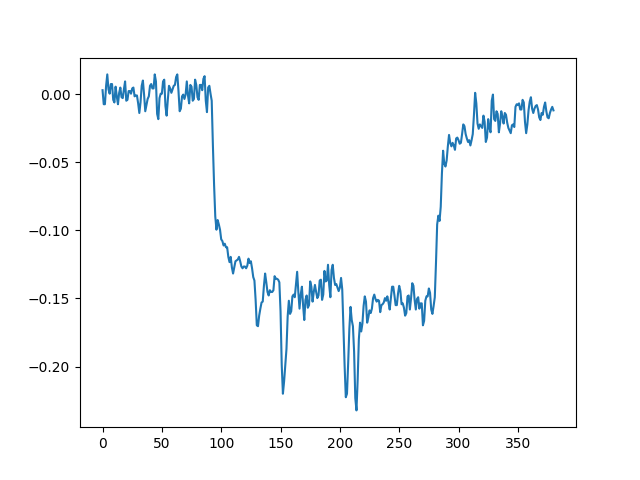

In [11]:
plt.figure()
plt.plot(data['Event_No_113'][:])

In [ ]:
plt.figure()
plt.scatter(df_filt.duration_s,df_filt.ecd,alpha=0.1)

In [10]:
len(df_filt)

898

In [12]:
import random

choices = random.choices(list(df_filt.name), k=9)

In [13]:
print(choices)

['Event_No_148', 'Event_No_76', 'Event_No_683', 'Event_No_583', 'Event_No_726', 'Event_No_746', 'Event_No_87', 'Event_No_545', 'Event_No_583']


In [ ]:
for choice in choices:
    plt.figure()
    plt.plot(data[choice][:])

In [ ]:
plt.figure()
plt.hist(df_filt.duration_s, bins = 75)
plt.title("Lambda DNA Translocations in 4M LiA, 600mV")
mean = np.mean(df_filt.duration_s)
plt.axvline(mean,ls='--',c='r', label = f"Mean event duration, {mean:.4f}s")
plt.xlabel("Event Duration /s")
plt.ylabel("Counts")
plt.legend()

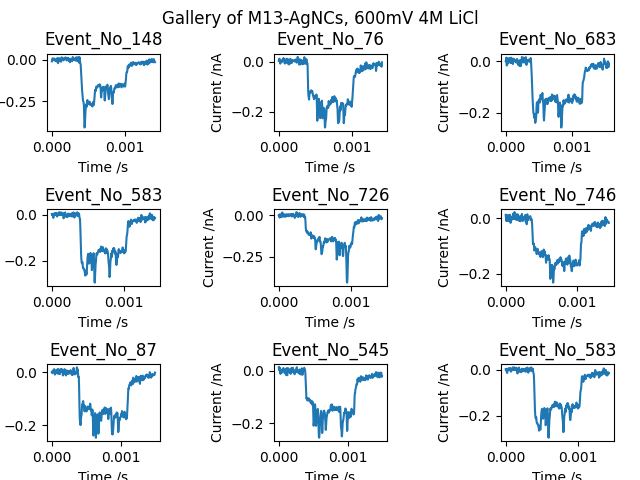

In [14]:
fig, axs = plt.subplots(nrows=3,ncols=3)
fig.suptitle("Gallery of M13-AgNCs, 600mV 4M LiCl")
fig.tight_layout()
fig.subplots_adjust(hspace=1,wspace=1)
# fig.subplots_adjust(hspace = 2, wspace = 2)
for i, c in enumerate(choices):
    axs[i//3,i%3].plot(np.arange(len(data[c][:]))/250000,data[c][:])
    axs[i//3,i%3].set_title(c)
    axs[i//3, i%3].set_xlabel("Time /s")
    axs[i//3, i%3].set_ylabel("Current /nA")

In [15]:
file.close()

In [16]:
import os
df_filt.to_pickle(os.path.join("/Volumes/ME424_HD/nanopores/2023_02_07/ch2/pore8/data2","df_filt.pkl" ))

(-6e-06, 0.0)

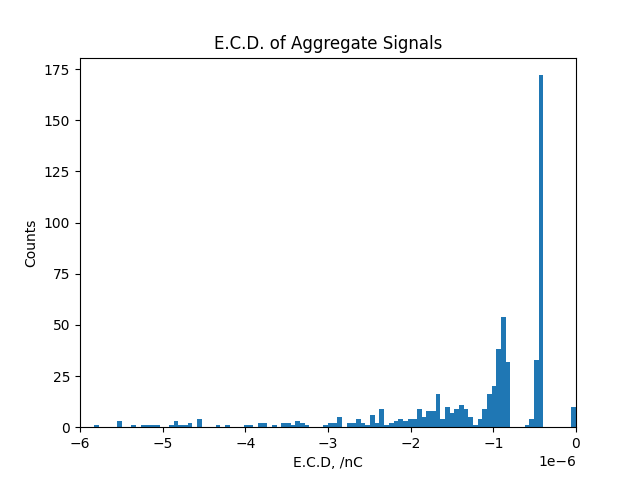

In [34]:
plt.figure()
plt.hist(df_filt.ecd, bins=256)
plt.title("E.C.D. of Aggregate Signals")
plt.xlabel("E.C.D, /nC")
plt.ylabel("Counts")
plt.xlim([-0.6e-5,0])